# 🧠 Fake News Challenge – Core Notebook

## 1. Load & Inspect Dataset

## 2. Preprocess Text

## 3. Exploratory Analysis
- Word frequencies
- Article lengths
- Named entities

## 4. Visualization

## 5. Prompt Engineering
- Article selection
- Prompt design
- LLM response capture

## 6. Reflection


In [3]:
#Imports

import numpy as np
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import spacy
from wordcloud import WordCloud

In [4]:
#Load data

from google.colab import drive
drive.mount('/content/drive')

real_df = pd.read_csv('/content/drive/MyDrive/MetopioChallenge/True.csv')
fake_df = pd.read_csv('/content/drive/MyDrive/MetopioChallenge/Fake.csv')

# Add label
real_df['label'] = 'real'
fake_df['label'] = 'fake'

# Combine datasets
df = pd.concat([real_df, fake_df]).reset_index(drop=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Preprocess text
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

df['tokens'] = df['text'].apply(preprocess)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [6]:
#Get top 10 most frequent words

from itertools import chain

def get_top_words(df, label):
    all_words = list(chain.from_iterable(df[df['label'] == label]['tokens']))
    return Counter(all_words).most_common(10)

real_top = get_top_words(df, 'real')
fake_top = get_top_words(df, 'fake')

print(real_top)
print(fake_top)


[('said', 99037), ('trump', 54249), ('would', 31526), ('reuters', 28412), ('president', 26397), ('state', 19728), ('government', 18288), ('new', 16784), ('house', 16519), ('states', 16515)]
[('trump', 74241), ('said', 31149), ('people', 26015), ('president', 25772), ('would', 23461), ('one', 22995), ('clinton', 18085), ('obama', 17920), ('like', 17660), ('donald', 17235)]


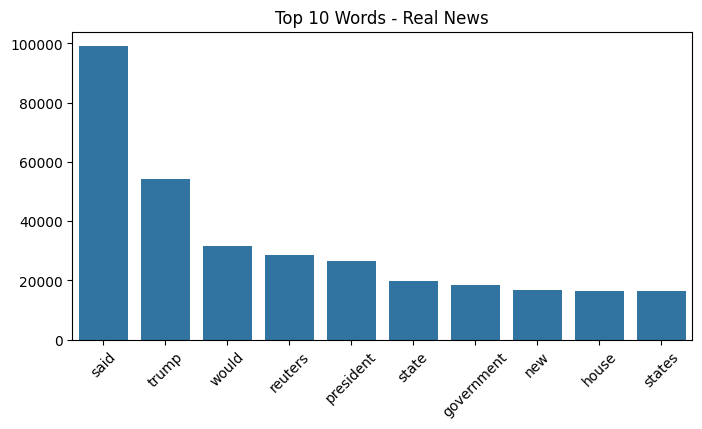

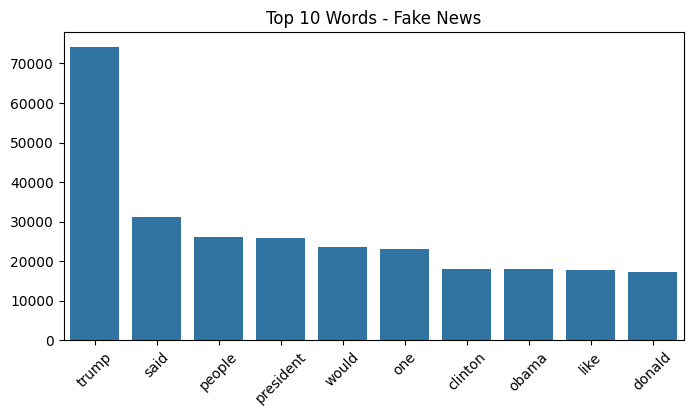

In [7]:
#Plot most frequent words

def plot_top_words(top_words, title):
    words, counts = zip(*top_words)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(words), y=list(counts))
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_top_words(real_top, "Top 10 Words - Real News")
plot_top_words(fake_top, "Top 10 Words - Fake News")

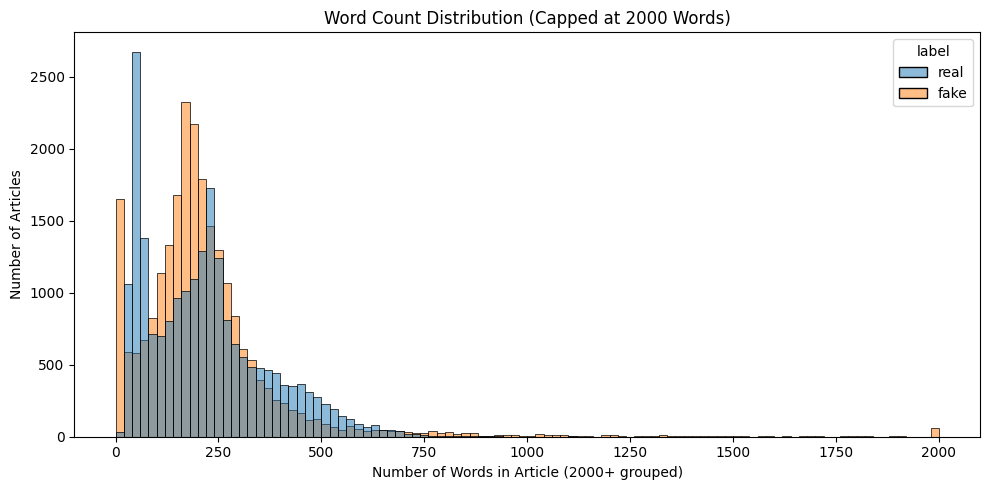

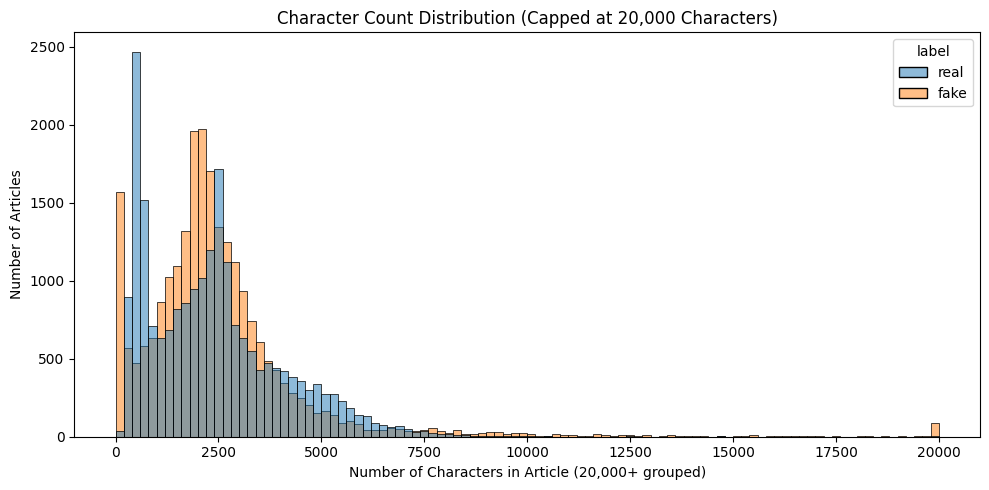

In [8]:
#Article length analysis
df['char_len'] = df['text'].str.len()
df['word_len'] = df['tokens'].apply(len)

#Word count plot
df['word_len_capped'] = df['word_len'].apply(lambda x: x if x <= 2000 else 2000)

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='word_len_capped', hue='label', bins=100, stat='count', common_norm=False)
plt.title("Word Count Distribution (Capped at 2000 Words)")
plt.xlabel("Number of Words in Article (2000+ grouped)")
plt.ylabel("Number of Articles")
plt.tight_layout()
plt.show()


#Character count plot
df['char_len_capped'] = df['char_len'].apply(lambda x: x if x <= 20000 else 20000)

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='char_len_capped', hue='label', bins=100, stat='count', common_norm=False)
plt.title("Character Count Distribution (Capped at 20,000 Characters)")
plt.xlabel("Number of Characters in Article (20,000+ grouped)")
plt.ylabel("Number of Articles")
plt.tight_layout()
plt.show()

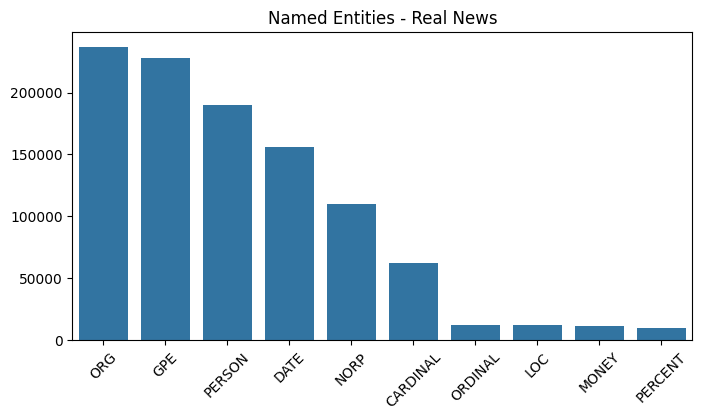

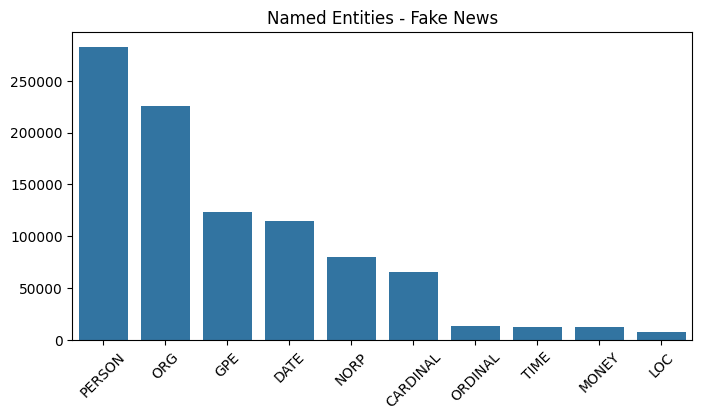

In [9]:
# Named Entity Extraction

nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    doc = nlp(text)
    entities = [ent.label_ for ent in doc.ents]
    return entities

df['entities'] = df['text'].apply(extract_entities)
df['entity_counts'] = df['entities'].apply(lambda ents: Counter(ents))

# Aggregate and plot named entity counts
from collections import defaultdict
from collections import Counter

def sum_entity_counts(df, label):
    filtered = df[df['label'] == label]['entity_counts']
    total_counter = Counter()
    for counter in filtered:
        total_counter += counter
    return dict(total_counter.most_common())

real_entities = sum_entity_counts(df, 'real')
fake_entities = sum_entity_counts(df, 'fake')

def plot_entity_counts(counts, title):
    keys = list(counts.keys())[:10]
    vals = list(counts.values())[:10]
    plt.figure(figsize=(8, 4))
    sns.barplot(x=keys, y=vals)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_entity_counts(real_entities, "Named Entities - Real News")
plot_entity_counts(fake_entities, "Named Entities - Fake News")